In [ ]:
"""
Cart Pole:
Observation:
0: Cart Position [-4.8, 4.8], with episode ending at [-2.4, 2.4]
1: Cart Velocity [-Inf, Inf]
2: Pole Angle [-0.418, 0.418] (in radians) with episode ending at [-0.2095, 0.2095]
3: Pole Angular Velocity [-Inf, Inf]

Env.Reset():
returns tuple:
0: observation
1: info

Env.Step():
returns tuple:
0: observation
1: reward
2: done
3: truncated
4: info



Notes:

- optimistic initialization helped explore the unseen actions
- with optmistic intialization, both reward functions performed similarly
- without optimistic initialization:
    - TBD

- TODO: 
    - try epsilon greedy MC
    - try off policy MC learning
"""

In [6]:
from discretize import discretize
from collections import defaultdict
from monte_carlo import *
from q_io import *
import gymnasium as gym
from plots import *

In [7]:
env = gym.make('CartPole-v1')

# for i in range(5):
#     Q, policy, returns, episode_lengths = on_policy_mc_control_optimistic_initialization(env, 5000, 0.95, episode_generator_func=generate_episode_custom_reward)
#     save_q_values(Q, f"optimistic_initialization/large_negative_reward/q/5000_episodes_95_gamma_{i}.csv")
#     save_array(returns, f"optimistic_initialization/large_negative_reward/returns/5000_episodes_95_gamma_{i}.csv")
#     save_array(episode_lengths, f"optimistic_initialization/large_negative_reward/episode_length/5000_episodes_95_gamma_{i}.csv")
#     Q, policy, returns, episode_lengths = on_policy_mc_control_optimistic_initialization(env, 5000, 0.95)
#     save_q_values(Q, f"optimistic_initialization/regular_reward/q/5000_episodes_95_gamma_{i}.csv")
#     save_array(returns, f"optimistic_initialization/regular_reward/returns/5000_episodes_95_gamma_{i}.csv")
#     save_array(episode_lengths, f"optimistic_initialization/regular_reward/episode_length/5000_episodes_95_gamma_{i}.csv")



Episode: 100%|██████████| 5000/5000 [00:57<00:00, 87.09it/s] 


In [8]:
# load values



returns_neg_reward = [[] for i in range(5)]
episode_lengths_neg_reward = [[] for i in range(5)]
returns_reg_reward = [[] for i in range(5)]
episode_lengths_reg_reward = [[] for i in range(5)]

for i in range(5):
    returns_neg_reward[i] = load_array(f"optimistic_initialization/large_negative_reward/returns/5000_episodes_95_gamma_{i}.csv")
    episode_lengths_neg_reward[i] = load_array(f"optimistic_initialization/large_negative_reward/episode_length/5000_episodes_95_gamma_{i}.csv")
    returns_reg_reward[i] = load_array(f"optimistic_initialization/regular_reward/returns/5000_episodes_95_gamma_{i}.csv")
    episode_lengths_reg_reward[i] = load_array(f"optimistic_initialization/regular_reward/episode_length/5000_episodes_95_gamma_{i}.csv")


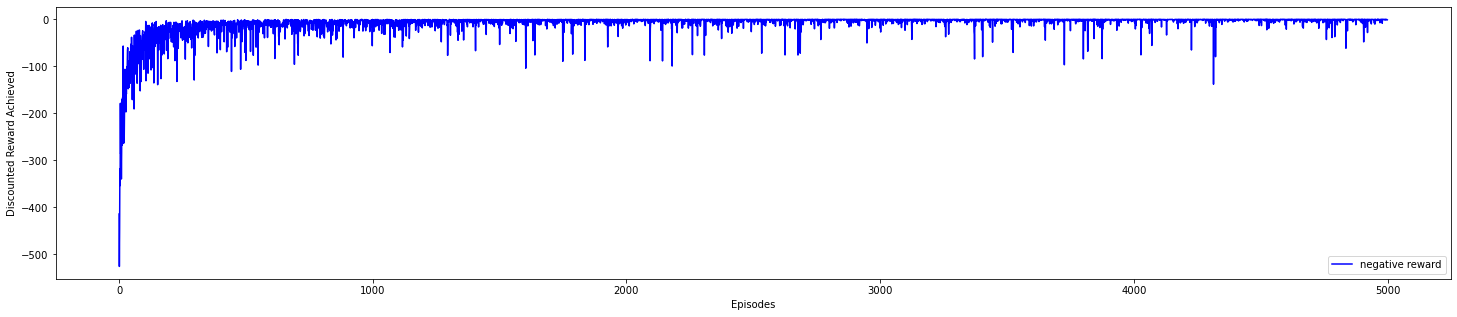

In [13]:
plot_returns([returns_neg_reward], ['negative reward'])

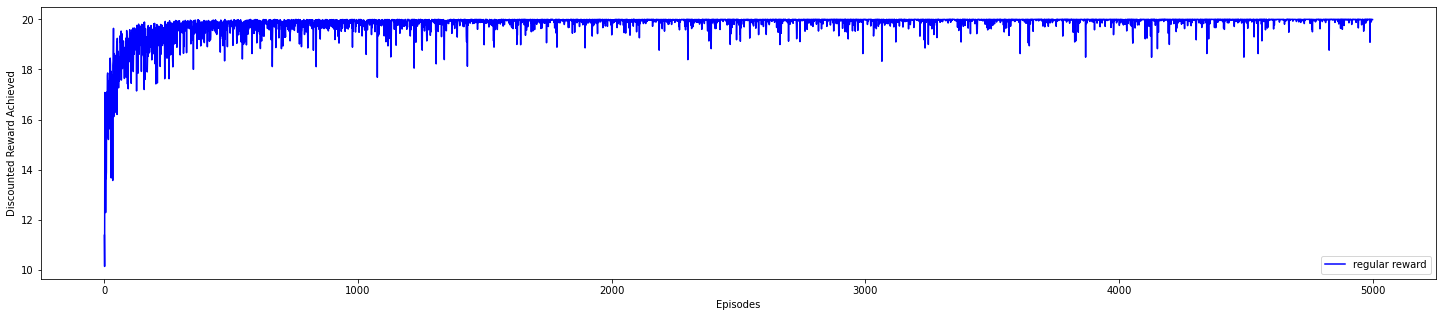

In [12]:
plot_returns([returns_reg_reward], ['regular reward'])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


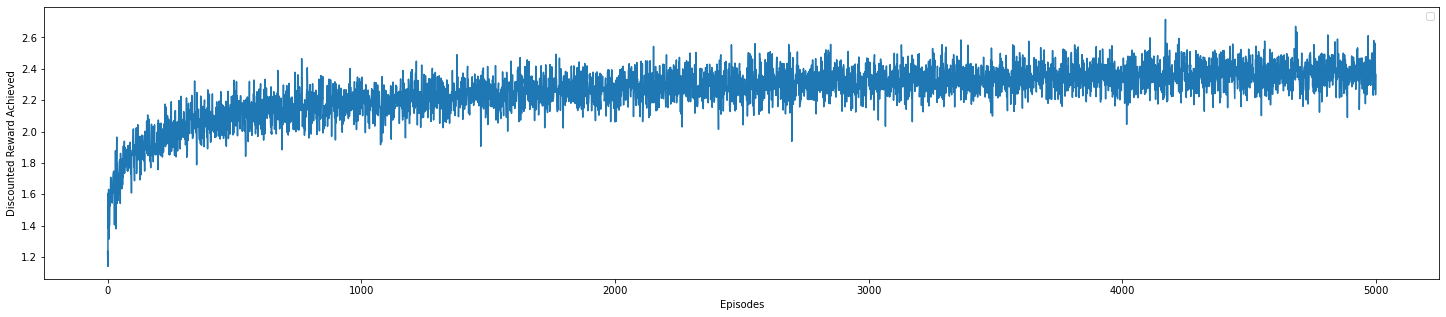

In [25]:
plot_single_iteration_returns(np.log10(np.average(episode_lengths_reg_reward, axis=0)))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


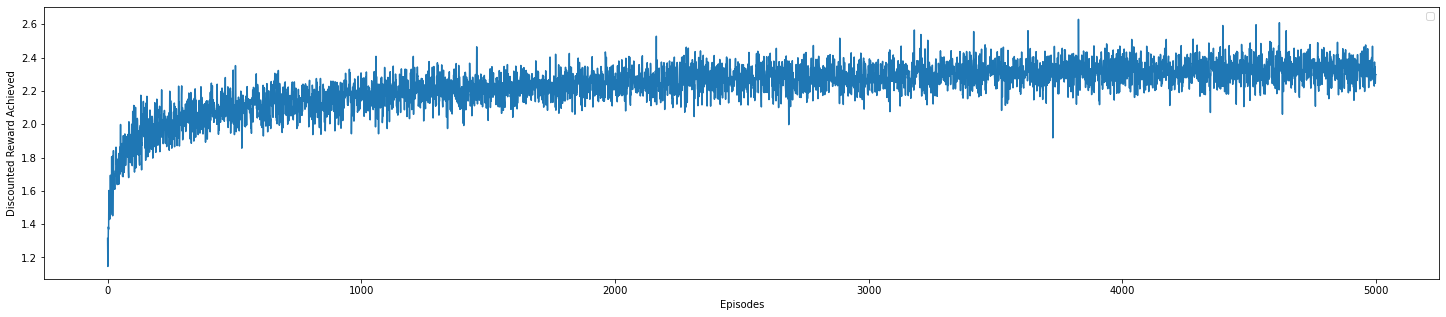

In [24]:
plot_single_iteration_returns(np.log10(np.average(episode_lengths_neg_reward, axis=0)))

In [26]:
env = gym.make('CartPole-v1', render_mode='human')
run_iterations(env, Q, 10)